In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl

dataset = sns.load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='count', ylabel='age'>

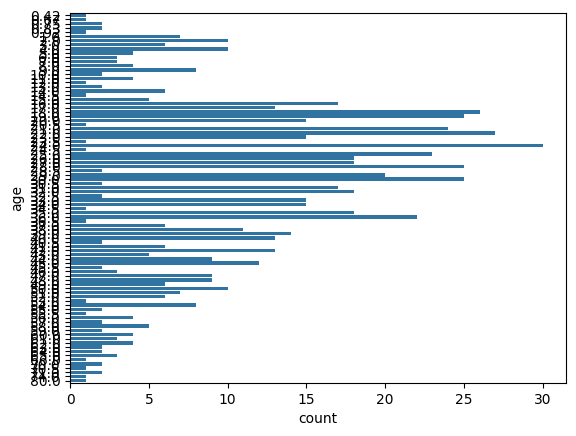

In [22]:
sns.countplot(data=dataset, y="age")

<Axes: xlabel='class', ylabel='survived'>

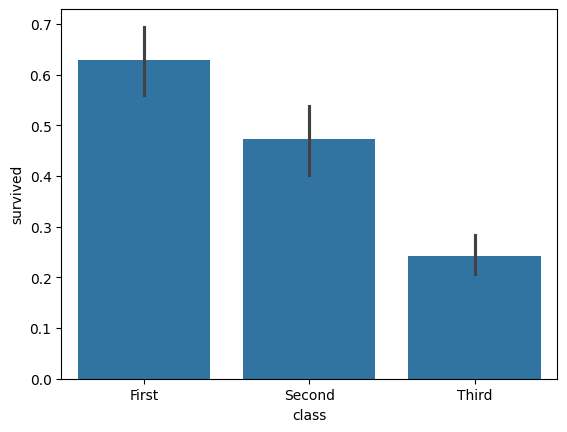

In [23]:
sns.barplot(data=dataset, x="class", y="survived")

In [24]:
housing = skl.datasets.fetch_california_housing()

data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Целевая переменная (цена дома)

print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


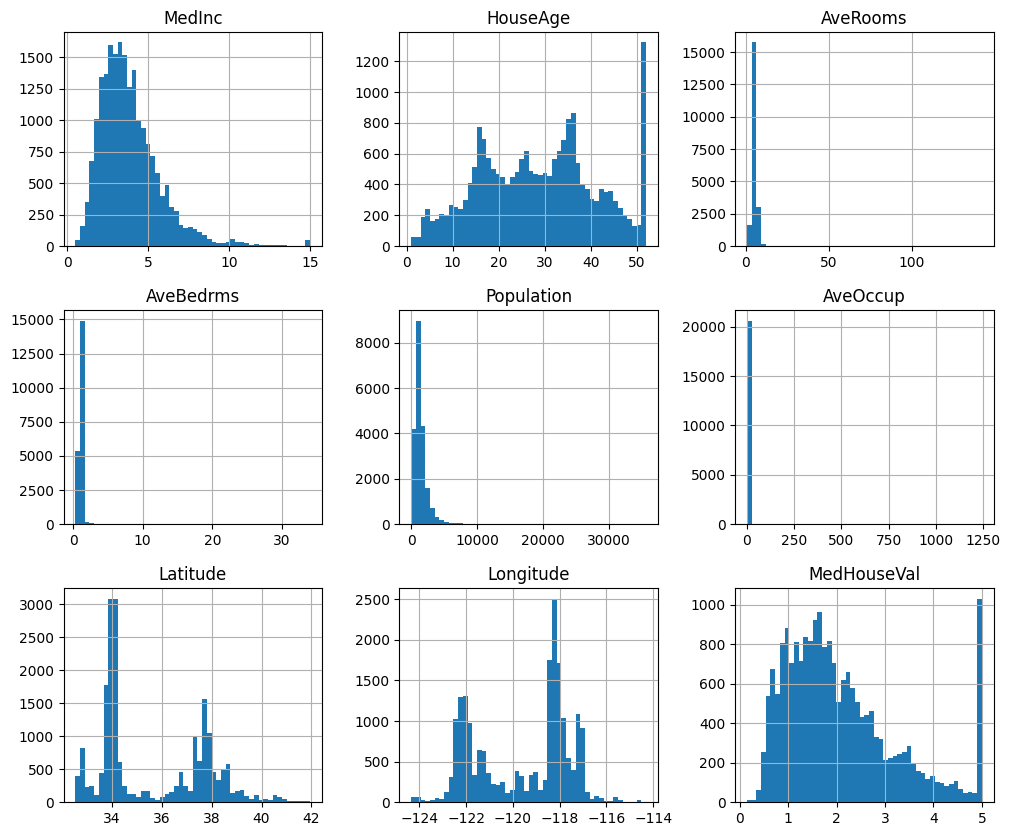

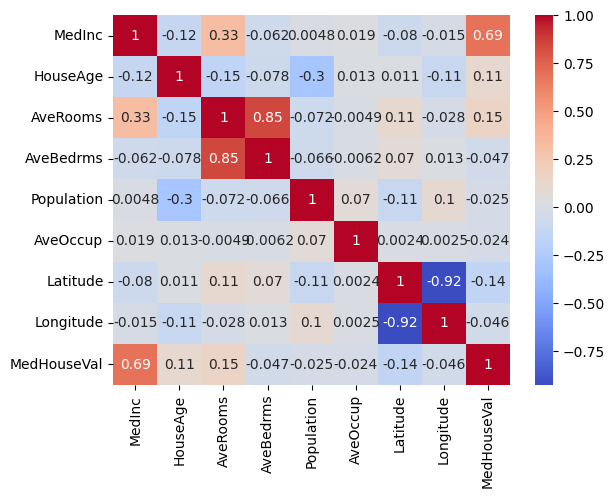

In [25]:
# Проверка на пропуски
print(data.isnull().sum())

# Гистограммы для всех признаков
data.hist(bins=50, figsize=(12, 10))
plt.show()

# Матрица корреляций
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение на признаки (X) и целевую переменную (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных (опционально, но полезно для линейных моделей)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание и обучение модели
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = lin_reg.predict(X_test_scaled)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R²: {r2}")

Linear Regression - MSE: 0.5558915986952444, R²: 0.5757877060324508


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение модели
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf_reg.predict(X_test_scaled)

# Оценка качества модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MSE: 0.255169737347244, R²: 0.8052747336256919


In [29]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация для линейной регрессии
lin_reg_scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
lin_reg_rmse_scores = (-lin_reg_scores) ** 0.5
print(f"Linear Regression CV RMSE: {lin_reg_rmse_scores.mean()}")

# Кросс-валидация для случайного леса
rf_reg_scores = cross_val_score(rf_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rf_reg_rmse_scores = (-rf_reg_scores) ** 0.5
print(f"Random Forest CV RMSE: {rf_reg_rmse_scores.mean()}")

Linear Regression CV RMSE: 0.7205271873526421
Random Forest CV RMSE: 0.5114230500408267


In [30]:
importances = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': housing.feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


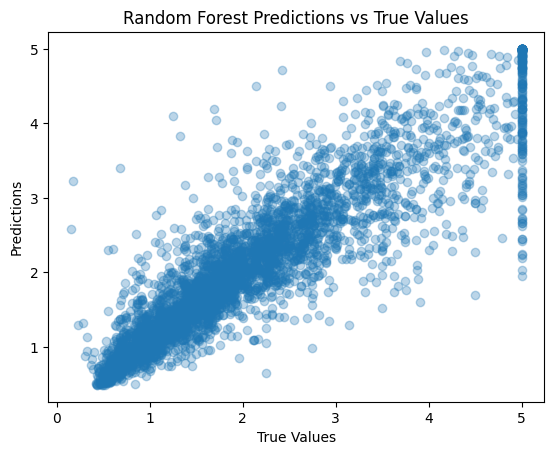

In [31]:
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Predictions vs True Values")
plt.show()

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормализация данных (приведение к диапазону 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 2s 0us/step


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Создание модели
model = Sequential()

# Входной слой: преобразует изображение 28x28 в вектор 784
model.add(Flatten(input_shape=(28, 28)))

# Скрытые слои
model.add(Dense(128, activation='relu'))  # Полносвязный слой с 128 нейронами
model.add(Dense(64, activation='relu'))   # Еще один слой с 64 нейронами

# Выходной слой: 10 нейронов (по одному для каждой цифры) + softmax
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9240 - val_loss: 0.1373 - val_accuracy: 0.9586
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.1099 - val_accuracy: 0.9671
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.1112 - val_accuracy: 0.9686
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.0929 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9851 - val_loss: 0.0994 - val_accuracy: 0.9727
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.1096 - val_accuracy: 0.9704
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.1192 - val_accuracy:

In [35]:
# Оценка на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9744
Test Accuracy: 97.44%


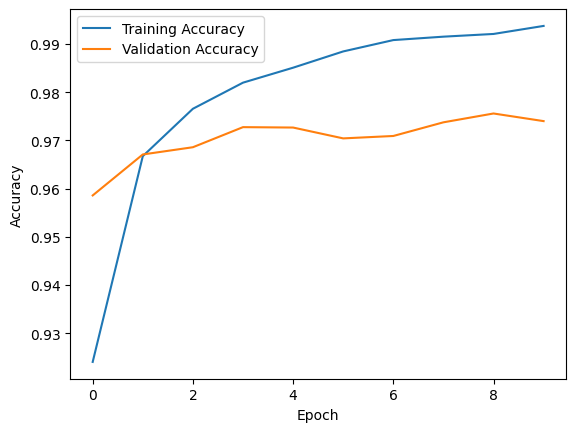

In [36]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding


dataset = sns.load_dataset('titanic')
dataset = dataset.dropna()

x = dataset[['pclass', 'sex', 'age', 'fare']]
x['sex'] = x['sex'].map({'male': 0, 'female': 1})
y = dataset['survived']

X = np.expand_dims(X, axis=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(4, 1)))  # LSTM слой
model.add(Dense(1, activation='sigmoid'))  # Выходной слой

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
print(x_train)
print(y_train)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy * 100:.4f}")


C:\Users\NikaR\AppData\Local\Temp\ipykernel_12540\90658409.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = x['sex'].map({'male': 0, 'female': 1})


Epoch 1/20
4/4 [==============================] - 2s 120ms/step - loss: 0.9799 - accuracy: 0.3362 - val_loss: 0.8920 - val_accuracy: 0.2414
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 0.8357 - accuracy: 0.3190 - val_loss: 0.7477 - val_accuracy: 0.3793
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 0.7340 - accuracy: 0.3190 - val_loss: 0.6510 - val_accuracy: 0.7586
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.6466 - val_loss: 0.5993 - val_accuracy: 0.7586
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.6446 - accuracy: 0.6638 - val_loss: 0.5720 - val_accuracy: 0.7586
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 0.6282 - accuracy: 0.6638 - val_loss: 0.5628 - val_accuracy: 0.7586
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 0.6242 - accuracy: 0.6810 - val_loss: 0.5592 - val_accuracy: 0.7586
Epoch 8/20
4/4 [==========

Epoch 1/50


C:\Users\NikaR\AppData\Local\Temp\ipykernel_33676\362063673.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})  # Кодирование пола


5/5 [==============================] - 1s 34ms/step - loss: -12555790581760.0000 - val_loss: -21006940.0000
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: -9748436521844736.0000 - val_loss: -380300544.0000
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 11/50
5/5 [==============================] -

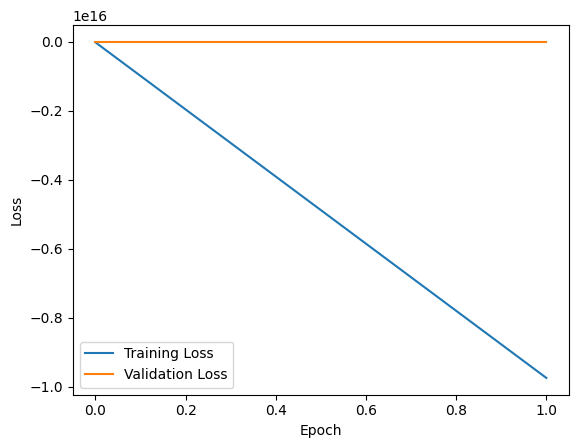

2/2 [==============================] - 0s 2ms/step


ValueError: cannot reshape array of size 4 into shape (28,28)

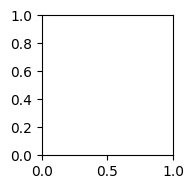

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
import tensorflow.keras.backend as K

# Загрузка данных
data = sns.load_dataset('titanic')
data = data.dropna()  # Удаление пропусков

# Предобработка
X = data[['pclass', 'sex', 'age', 'fare']]
X['sex'] = X['sex'].map({'male': 0, 'female': 1})  # Кодирование пола

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Параметры VAE
original_dim = X_train.shape[1]
intermediate_dim = 64
latent_dim = 2

# Энкодер
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Сэмплирование из latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]  # Размер батча
    dim = K.int_shape(z_mean)[1]  # Размерность латентного пространства
    epsilon = K.random_normal(shape=(batch, dim))  # Случайный шум
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Декодер
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Создание модели VAE
# Создание модели VAE
vae = Model(inputs, x_decoded_mean)

# Компиляция
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение
history = vae.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# График потерь на тренировочных и валидационных данных
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt


# Генерация восстановленных данных
decoded_imgs = vae.predict(X_test)

# Визуализация исходных и восстановленных изображений
n = 10  # Количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Исходное изображение
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
